<a href="https://colab.research.google.com/github/mdig505/beansubin/blob/main/tree/main/python/self_study/google_colab/%EB%8F%84%EC%8B%9C%EA%B3%B5%EC%9B%90_%EC%9C%84%EC%B9%98_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#도시공원 위치 분석

##기본 설정

###드라이브마운트

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


###라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

import folium

In [ ]:
#pip install wordcloud

In [ ]:
import wordcloud

###한글폰트설정

In [ ]:
#!apt -qq -y install fonts-nanum


fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rc("axes", unicode_minus=False)
mpl.font_manager._rebuild()

In [ ]:
#폰트를 선명하게 표시

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

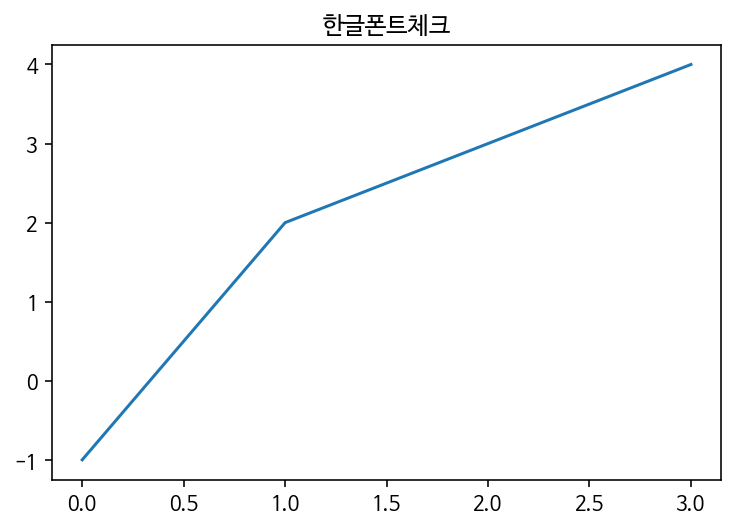

In [ ]:
pd.Series([-1,2,3,4]).plot(title = '한글폰트체크')

##데이터불러오기

In [ ]:
df = pd.read_csv('/drive/My Drive/google colaboration/inflearn/전국도시공원표준데이터.csv', encoding="cp949")
df.shape

(18137, 20)

In [ ]:
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


###기본 정보 보기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [ ]:
#결측치 구하기
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [ ]:
round(df.isnull().mean() * 100, 2)

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

###결측치 시각화

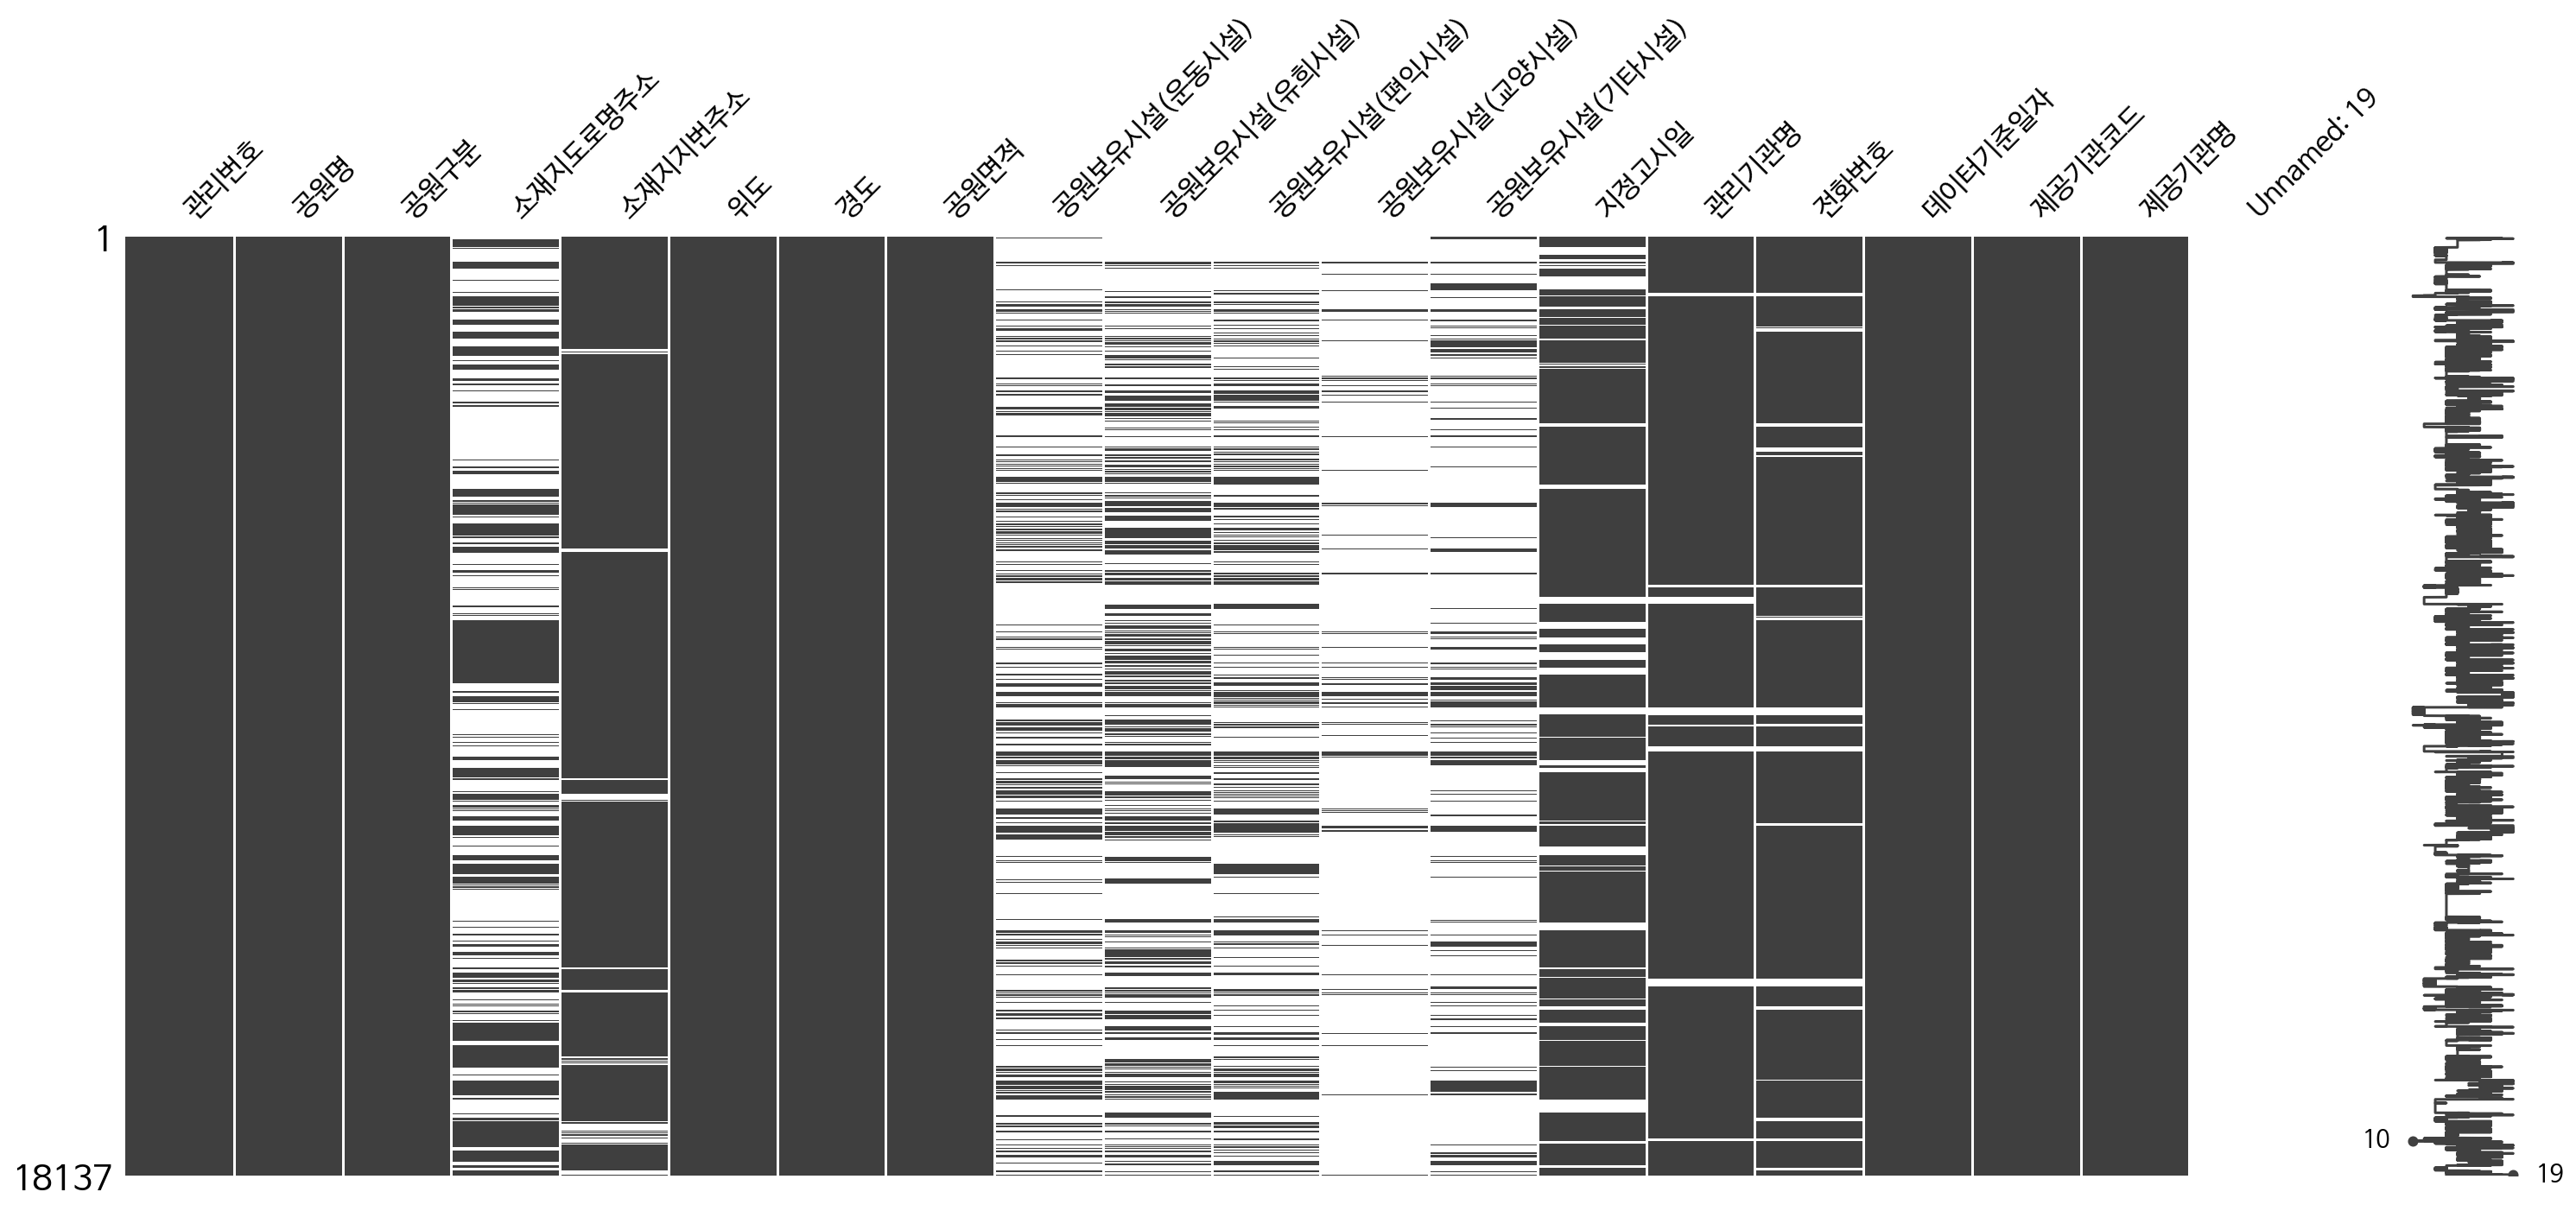

In [ ]:
import missingno as msno

msno.matrix(df)

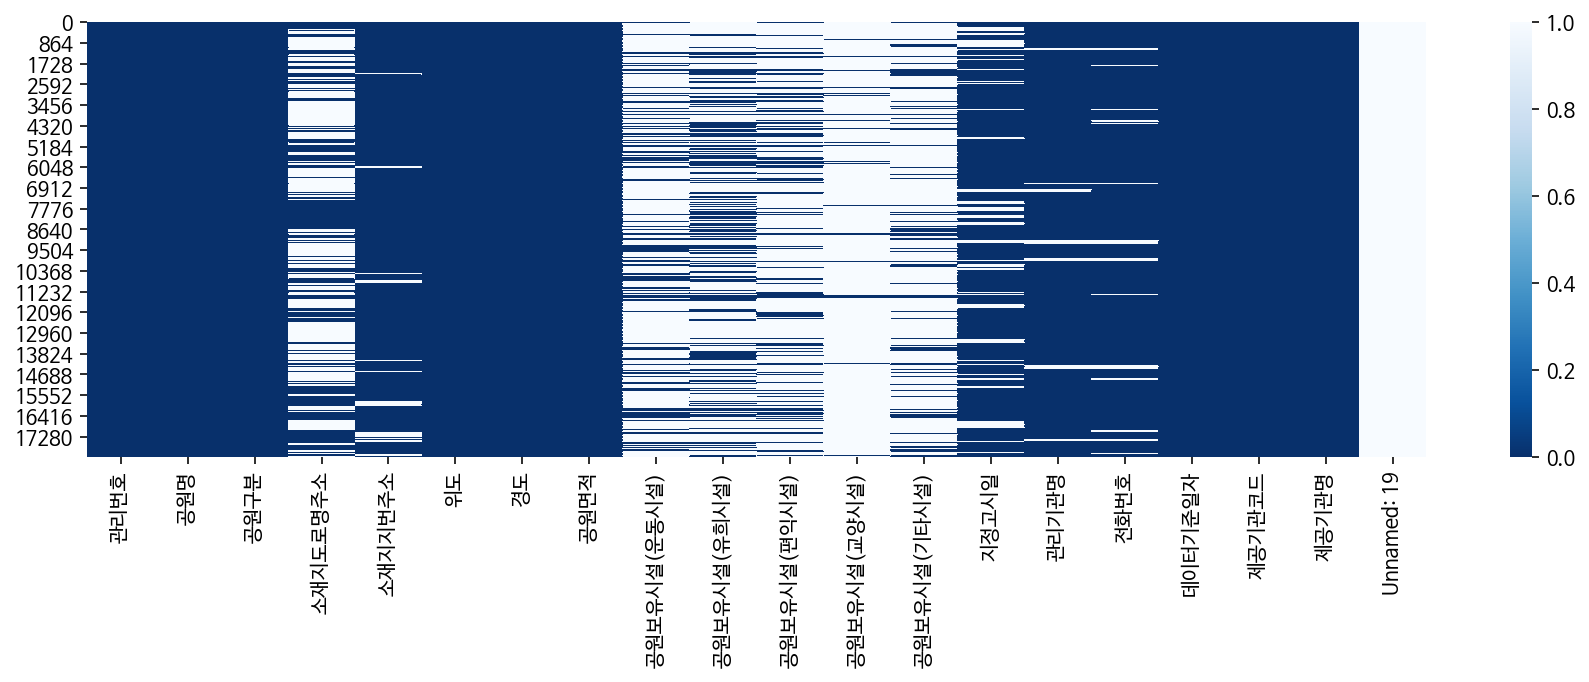

In [ ]:
null = df.isnull()

plt.figure(figsize=(15,4))
sns.heatmap(null, cmap = "Blues_r")

##데이터 전처리

###불필요한 컬럼 대체

In [ ]:
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [ ]:
df = df.drop(["Unnamed: 19"],axis = 1) #0일때는 행, 1일때는 열

df.shape

(18137, 19)

###결측치 대체

In [ ]:
df["소재지도로명주소"].isnull().sum()

10098

In [ ]:
df["소재지지번주소"].isnull().sum()

979

In [ ]:
df[df["소재지도로명주소"].notnull() & df["소재지지번주소"].notnull()].shape

(7060, 19)

In [ ]:
df["소재지도로명주소"] =df["소재지도로명주소"].fillna(df["소재지지번주소"])
df["소재지도로명주소"].isnull().sum()

0

In [ ]:
df[df["소재지도로명주소"].isnull() & df["소재지지번주소"].isnull()].shape

(0, 19)

###파생변수 만들기

In [ ]:
df["시도"] = df["소재지도로명주소"].str.split(expand = True)[0]
df[["소재지도로명주소","시도"]].head()

,소재지도로명주소,시도
0,부산광역시 강서구 구랑동 1199-7,부산광역시
1,부산광역시 강서구 구랑동 1219,부산광역시
2,부산광역시 강서구 대저1동 1330-7,부산광역시
3,부산광역시 강서구 대저2동 1870-67,부산광역시
4,부산광역시 강서구 대저2동 2407-1,부산광역시


In [ ]:
df["구군"] = df["소재지도로명주소"].str.split(expand = True)[1]
df[["소재지도로명주소","시도","구군"]].head()

,소재지도로명주소,시도,구군
0,부산광역시 강서구 구랑동 1199-7,부산광역시,강서구
1,부산광역시 강서구 구랑동 1219,부산광역시,강서구
2,부산광역시 강서구 대저1동 1330-7,부산광역시,강서구
3,부산광역시 강서구 대저2동 1870-67,부산광역시,강서구
4,부산광역시 강서구 대저2동 2407-1,부산광역시,강서구


In [ ]:
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [ ]:
df["시도"] = df["시도"].replace("강원","강원도") #replace는 텍스트가 완전히 일치해야만 텍스트를 변경함
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

### 이상치제거

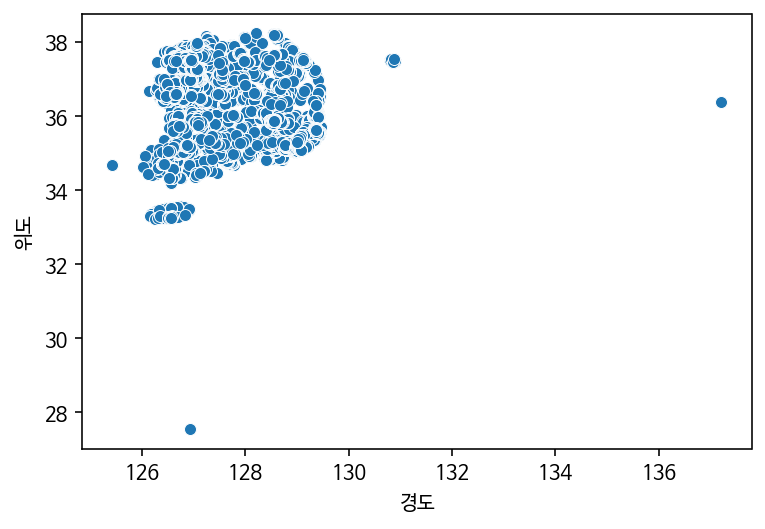

In [ ]:
sns.scatterplot(data= df, x="경도", y = "위도")

In [ ]:
df_park = df[(df["경도"] < 132) & (df["위도"] > 30)].copy()
df_park

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,28140-00009,송림4공원,어린이공원,인천광역시 동구 송림동 291-6,인천광역시 동구 송림동 291-6,37.478715,126.653257,412.9,NaN,야외무대,NaN,NaN,"조형파고라, 앉음벽",1998-07-20,인천광역시 동구청,032-770-6205,2019-07-30,3500000,인천광역시 동구,인천광역시,동구
18133,47760-00002,서부공원,근린공원,경상북도 영양군 영양읍 서부리 123,경상북도 영양군 영양읍 서부리 123,36.660456,129.114953,56045.0,NaN,NaN,화장실,NaN,NaN,1973-03-02,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군,경상북도,영양군
18134,47760-00003,입암공원,근린공원,경상북도 영양군 입암면 신구리 산27-5,경상북도 영양군 입암면 신구리 산27-5,36.594802,129.093007,109262.0,NaN,NaN,NaN,NaN,NaN,1977-06-29,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군,경상북도,영양군
18135,47760-00004,수비공원,근린공원,경상북도 영양군 수비면 발리리 산48,경상북도 영양군 수비면 발리리 산48,36.761440,129.200011,67159.0,NaN,NaN,NaN,NaN,NaN,1978-02-14,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군,경상북도,영양군


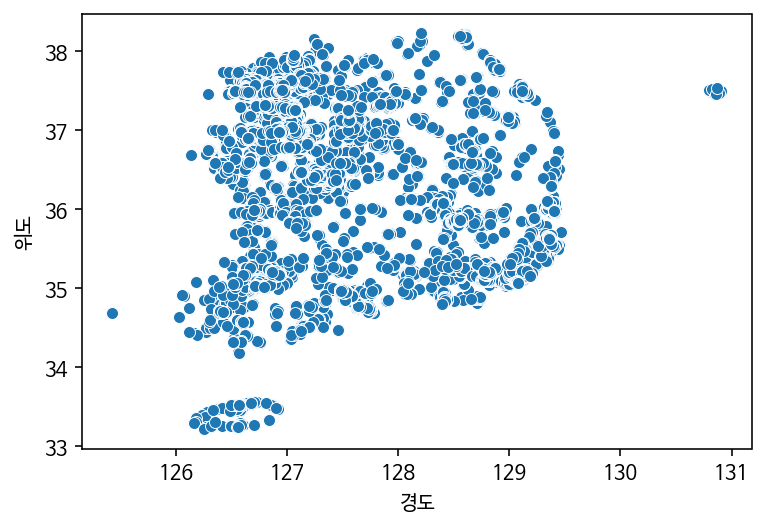

In [ ]:
sns.scatterplot(data=df_park,  x="경도", y = "위도")

In [ ]:
df[["위도","경도"]].describe()

,위도,경도
count,18137.000000,18137.000000
mean,36.335922,127.543937
std,1.051835,0.892670
min,27.551606,125.430955
25%,35.275430,126.872301
50%,36.364729,127.130926
75%,37.404278,128.466193
max,38.224926,137.202661


### 날짜 데이터 다루기

In [ ]:
df["지정고시일"]

0        2011-09-02
1        2008-02-28
2        2013-01-23
3        1998-07-25
4        1995-04-07
            ...    
18132    1998-07-20
18133    1973-03-02
18134    1977-06-29
18135    1978-02-14
18136    2009-11-19
Name: 지정고시일, Length: 18137, dtype: object

In [ ]:
df["지정고시일"] = pd.to_datetime(df["지정고시일"]) #오브젝트 타입을 데이트타임으로 변경

In [ ]:
df["고시연도"] = df["지정고시일"].dt.year
df["고시월"] = df["지정고시일"].dt.month

In [ ]:
df[["지정고시일","고시연도","고시월"]]

,지정고시일,고시연도,고시월
0,2011-09-02,2011.0,9.0
1,2008-02-28,2008.0,2.0
2,2013-01-23,2013.0,1.0
3,1998-07-25,1998.0,7.0
4,1995-04-07,1995.0,4.0
...,...,...,...
18132,1998-07-20,1998.0,7.0
18133,1973-03-02,1973.0,3.0
18134,1977-06-29,1977.0,6.0
18135,1978-02-14,1978.0,2.0


In [ ]:
df.loc[df["공원명"].str.contains("화랑"), ["공원명","고시연도"]]

,공원명,고시연도
3077,판교제8호(화랑)공원,2004.0
4310,화랑공원,2010.0
7316,화랑공원,1972.0
10490,화랑,2004.0
10763,화랑공원,1980.0
15066,화랑,1991.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


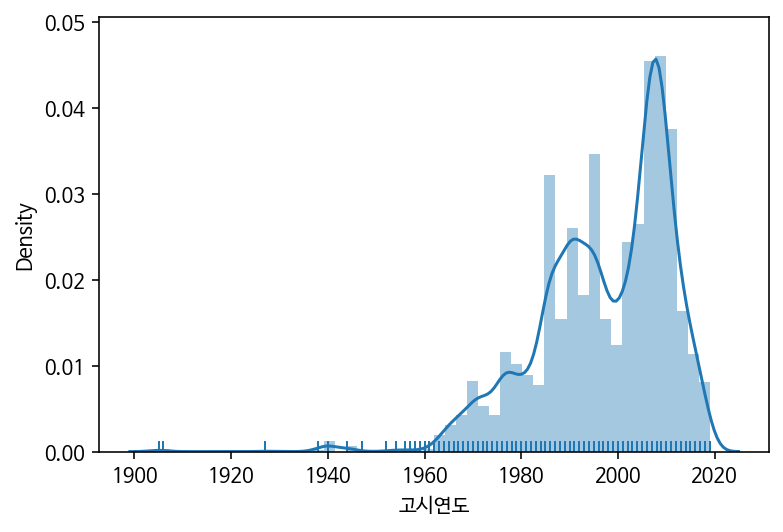

In [ ]:
sns.distplot(df.loc[df["고시연도"].notnull(),"고시연도"], rug = True)

In [ ]:
year_month = pd.pivot_table(df, index = "고시연도",columns="고시월", values="공원명", aggfunc = "count")
year_month = year_month[(year_month.index > 2000) & (year_month.index < 2019)]

In [ ]:
year_month.round(0).astype(int).style.background_gradient()

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,48,12,7,42,21,16,6,16,30,36,37,40
2002.0,38,19,18,10,18,14,49,17,7,7,59,55
2003.0,21,13,17,19,10,23,4,8,7,18,48,38
2004.0,48,18,16,18,13,24,7,48,10,24,59,135
2005.0,55,32,18,23,43,33,16,62,18,34,60,105
2006.0,84,34,69,31,54,32,18,33,24,36,119,120
2007.0,69,12,9,42,16,46,62,66,84,164,245,106
2008.0,163,45,77,42,30,102,15,61,32,20,24,126
2009.0,59,31,162,135,57,60,36,23,96,27,73,100


###텍스트 데이터 다루기

#### 정규표현식

In [ ]:
#정규표현식 라이브러리 로드
import re

In [ ]:
pd.options.display.max_columns = 100

In [ ]:
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2008.0,2.0
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2013.0,1.0
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,1998.0,7.0
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,1995.0,4.0


In [ ]:
gym = df["공원보유시설(운동시설)"].unique().tolist()
gym = str(gym) #리스트를 스트링 형태로 변경
gym[:1000]

"['4', '7', nan, '8', '5', '6', '3', '10', '14', '9', '30', '2', '13', '12', '40', '17', '-', '농구장', '궁도장', '풋살구장', '풋살구장, 농구장, 인라인스케이트장', '축구장', '족구장', '게이트볼장', '운동기구14개, 농구장2개소, 족구장1개소', '운동기구6개, 족구장1개소', '운동기구10개', '운동기구4개', '운동기구7개', '에어로빅장, 농구장', '테니스장, 씨름장, 농구장', '바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1', 'TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1', '철봉1', '하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1', '철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1', '스트레칭롤러1,풀웨이트1,바웨이트1', '하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3', '스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1', '하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1', '윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,옆파도타기1', '크로스워킹+스카이워킹1,파워프레스+풀웨이트1,싸이클론+트위스트1,스탠드업+마사지롤1,사이드스윙+터닝암1,푸시웨이트+레그프레스1', '평행봉1', '트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1', '크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1', '크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1', '족구장1,역기1', '등지압기1,마라톤운동+공중걷기운동1,허리돌리기+온몸돌리기1, 온몸역기올리기+온몸근육풀기1', '트리플트위스트1,트윈바디싣업1,크로스컨

In [ ]:
gym = gym.replace("+",",").replace("'",",").replace(" ", ",").replace("/", ",")
gym

'[,4,,,,7,,,nan,,,8,,,,5,,,,6,,,,3,,,,10,,,,14,,,,9,,,,30,,,,2,,,,13,,,,12,,,,40,,,,17,,,,-,,,,농구장,,,,궁도장,,,,풋살구장,,,,풋살구장,,농구장,,인라인스케이트장,,,,축구장,,,,족구장,,,,게이트볼장,,,,운동기구14개,,농구장2개소,,족구장1개소,,,,운동기구6개,,족구장1개소,,,,운동기구10개,,,,운동기구4개,,,,운동기구7개,,,,에어로빅장,,농구장,,,,테니스장,,씨름장,,농구장,,,,바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1,,,,TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1,,,,철봉1,,,,하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1,,,,철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1,,,,스트레칭롤러1,풀웨이트1,바웨이트1,,,,하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3,,,,스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1,,,,하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1,,,,윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,옆파도타기1,,,,크로스워킹,스카이워킹1,파워프레스,풀웨이트1,싸이클론,트위스트1,스탠드업,마사지롤1,사이드스윙,터닝암1,푸시웨이트,레그프레스1,,,,평행봉1,,,,트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1,,,,크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1,,,,크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1,,,,족구장1,역기1,,,,등지압기1,마라톤운동,공중걷기운동1,허리돌리기,온몸돌리기1,,온몸역기올리기,온몸근육풀기1,,,,트리플트위스트1,트윈바디싣업1,크로스컨

In [ ]:
#숫자 제거, 대괄호 제거
gym = re.sub("[\[\d\-nan\.\]]","",gym) #re.sub: 정규표현식 함수
gym = re.sub(",{2,}",",",gym)
gym

',농구장,궁도장,풋살구장,풋살구장,농구장,인라인스케이트장,축구장,족구장,게이트볼장,운동기구개,농구장개소,족구장개소,운동기구개,족구장개소,운동기구개,운동기구개,운동기구개,에어로빅장,농구장,테니스장,씨름장,농구장,바디싣업,스트레칭롤러,전신돌리기,허리안마기,허리비틀기,TM스탭사이클,TM체어웨이트,TM트윈바디싣업,TM트윈트위스트,TM크로스컨트리,TM풀웨이트,철봉,하늘걷기,마라톤운동,허리돌리기,단철봉,윗몸일으키기,철봉,팔굽혀펴기,몸통돌리기,허리좌우로흔들기,스트레칭롤러,풀웨이트,바웨이트,하늘걷기,온몸허리돌리기,스트레칭기,거꾸로매달리기,하늘걷기,온몸허리돌리기,등허리지압기,철봉,스탭싸이클,풀웨이트,트리플트위스트,트윈바디싣업,크로스컨트리,스트레칭롤러,트윈워밍암,하늘걷기,스탭싸이클,체어폴,철봉,트리플트위스트,트윈바디싣업,윗몸일으키기,온몸허리돌리기,팔굽혀펴기,다리뻗치기,온몸허리돌리기,거꾸로매달리기,하늘걷기,온몸허리돌리기,옆파도타기,크로스워킹,스카이워킹,파워프레스,풀웨이트,싸이클론,트위스트,스탠드업,마사지롤,사이드스윙,터닝암,푸시웨이트,레그프레스,평행봉,트윈바디싣업,트윈트위스트,스탭싸이클,크로스컨트리,체어풀,크로스컨트리,자전거팔뻗기,등안마기,트윈워밍암,체어웨이트,오버턴스트레칭,크로스컨트리,롤링웨이스트,레그프레스,트윈트위스트,체어웨이트,족구장,역기,등지압기,마라톤운동,공중걷기운동,허리돌리기,온몸돌리기,온몸역기올리기,온몸근육풀기,트리플트위스트,트윈바디싣업,크로스컨트리,체어웨이트,롤링웨이스트,레그프레스,오버턴스트레칭,윗몸일으키기,트리플트위스트,평행봉,크로스컨트리,레그프레스,체어웨이트,롤링웨이스트,트윈바디싣업,레그스트레칭,크로스컨트리,어깨근육풀기,체어웨이트,트윈바디싣업(구형),트리플트위스트(구형),게이트볼장,운동시설,축구장,족구장,족구장,운동기구,운동기구,축구장,배드민턴장,농구장,배드민턴장,족구장,농구대,배드민턴장,배드민턴장,농구대,농구장,개소,배드민턴장,게이트볼장,개소,체력단련시설,개소,기,등,배드민턴장,개소,체력단련시설,개소,개,배드민턴장,개소,농구장,개소,체력단련시설,개소,개,다목

In [ ]:
#컴마 제거

gym_count = pd.Series(gym.split(",")).value_counts()
gym_count.head()

배드민턴장     221
농구장       216
운동기구      185
게이트볼장     156
체력단련시설    148
dtype: int64

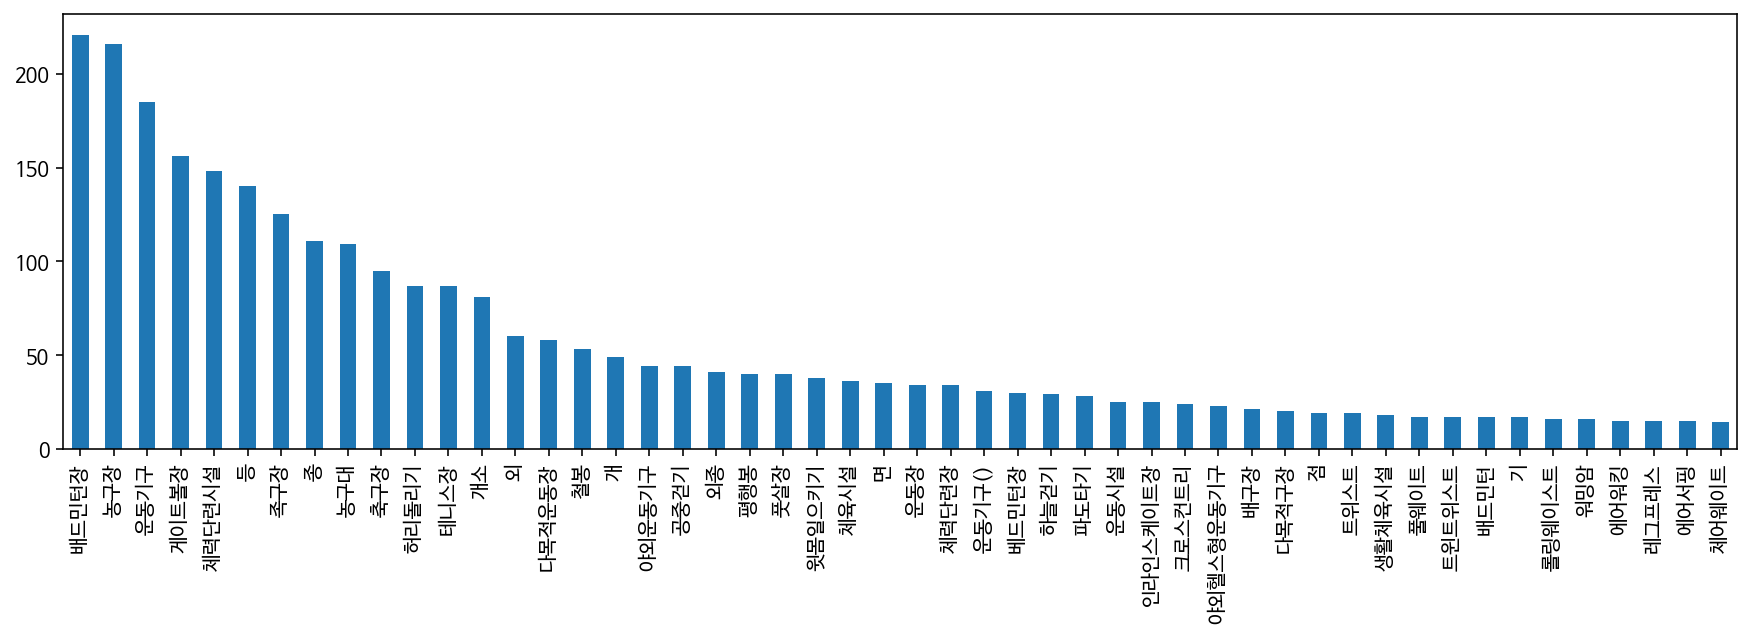

In [ ]:
gym_count.head(50).plot.bar(figsize = (15,4))

#### 워드클라우드 운동시설 빈도수 시각화

In [ ]:
from wordcloud import WordCloud

def wordcloud(data, width = 1200, height = 500) :
  word_draw = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf",
                        stopwords=["운동기구","개소","외종"],
                        background_color = "white",
                        width = width, height = height,
                        random_state = 42)
  word_draw.generate(data)

  plt.figure(figsize=(15,5))
  plt.imshow(word_draw)
  plt.axis("off")
  plt.show()

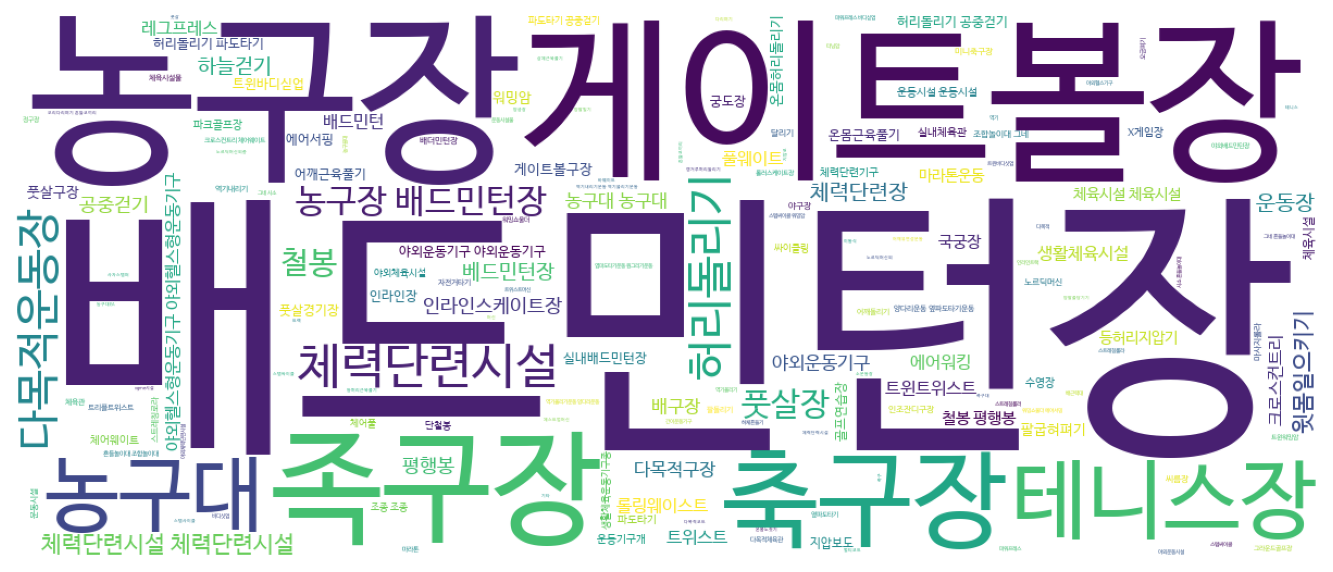

In [ ]:
wordcloud(gym)

####편익시설 텍스트 처리

In [ ]:
def get_string(text) :
  if pd.isna(text) :
    return text
  text = re.sub("[\d\.'\-(nan)\[\]\/]","", text)
  text = re.sub(" ","",text)
  text = re.sub(",{2,}",",",text)
  return text

In [ ]:
get_string("[1. '화장실' 5, 2. 주차장, -, nan /]")

'화장실,주차장,'

In [ ]:
get_string(np.nan)

nan

In [ ]:
df["편익시설"] = df["공원보유시설(편익시설)"].map(get_string) # map을 통해 위에서 구현한 함수를 적용

In [ ]:
df["편익시설"].value_counts().tail()

파고라,벤치,육각정자        1
주차장,관리실,화장실,파고라    1
비상급수               1
사각정자,등벤치           1
주차장,화장실,방문자센터      1
Name: 편익시설, dtype: int64

In [ ]:
type(np.nan)

float

In [ ]:
fac = ",".join(df.loc[df["편익시설"].notnull(), "편익시설"])
fac = get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [ ]:
fac = str(df['편익시설'].tolist())
fac = get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [ ]:
fac_counts = pd.Series(fac.split(",")).value_counts()
fac_counts.head()

화장실    1921
파고라     817
벤치      650
정자      535
주차장     502
dtype: int64

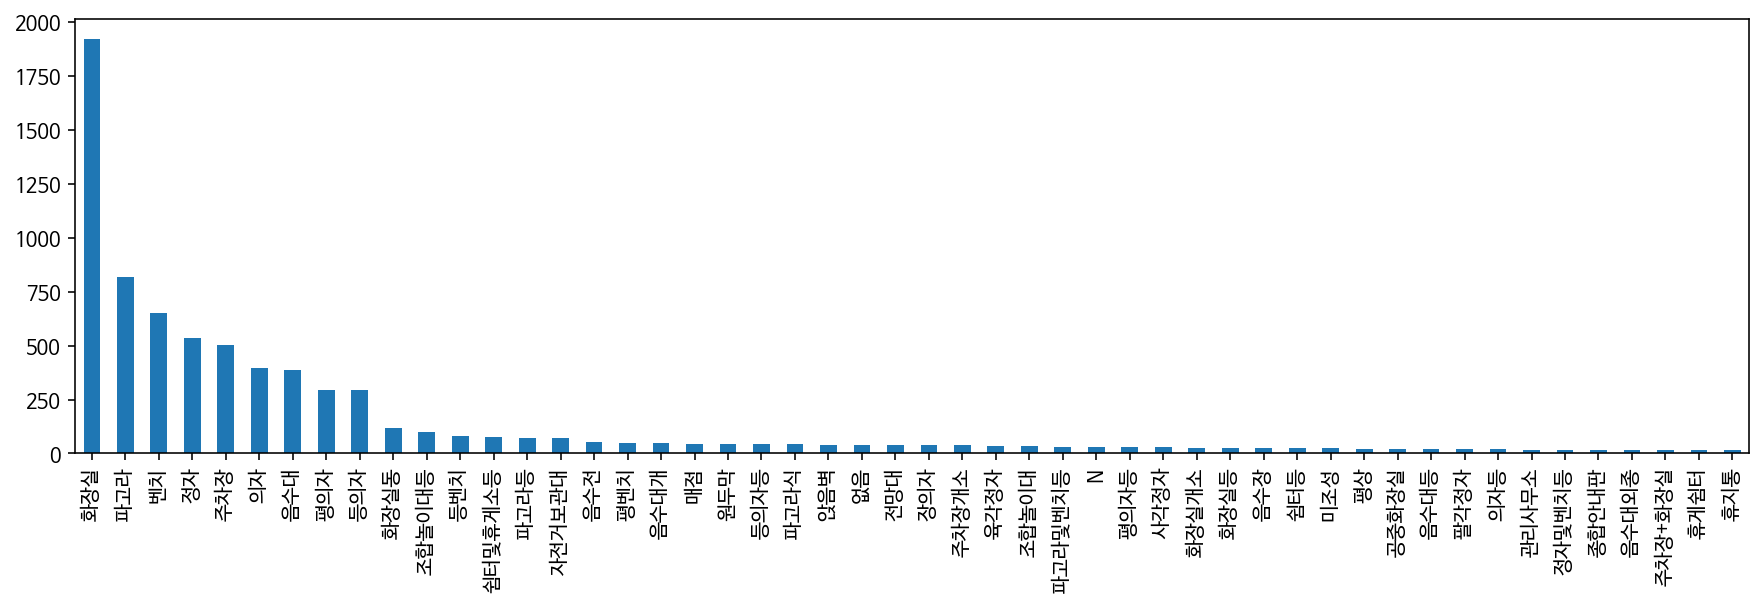

In [ ]:
fac_counts.head(50).plot.bar(figsize = (15,4))

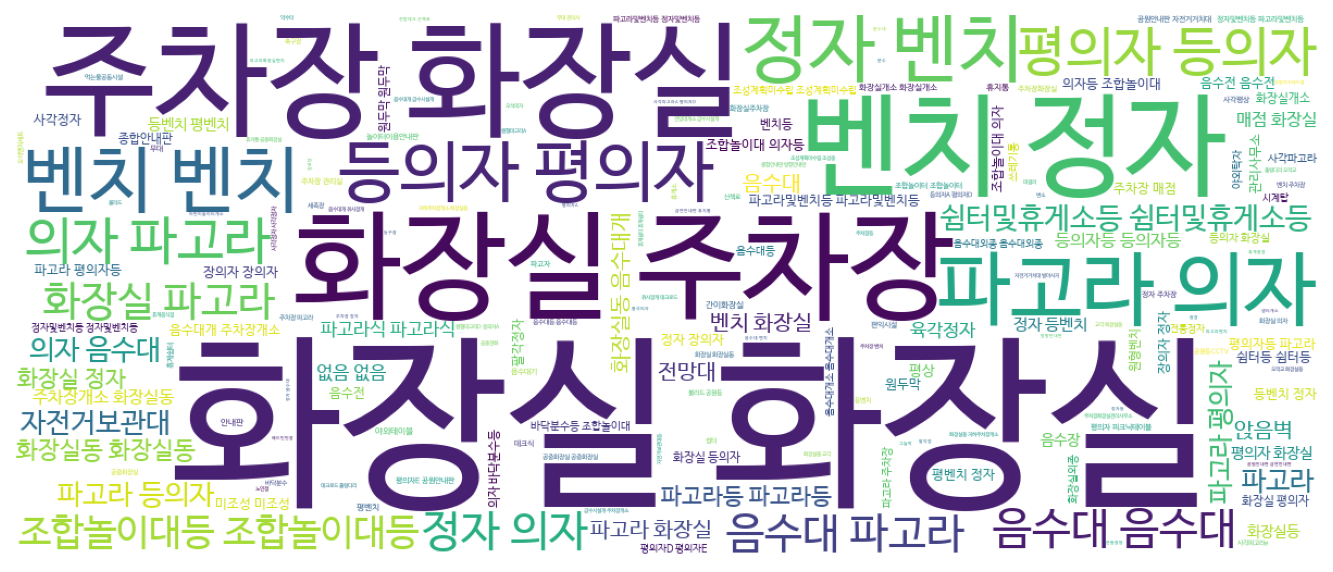

In [ ]:
wordcloud(fac)

#### 키워드별 빈도수 구하기

In [ ]:
facilities = ['화장실','주차장','음수대','파고라','정자','벤치','의자','놀이터','축구장','야영장','CCTV']

df_fac = df[df["공원보유시설(편익시설)"].notnull()]

In [ ]:
for f in facilities :
  df[f] = df_fac["공원보유시설(편익시설)"].str.contains(f)

In [ ]:
df[facilities].sum()

화장실     2208.0
주차장      611.0
음수대      493.0
파고라     1032.0
정자       648.0
벤치       850.0
의자       949.0
놀이터       21.0
축구장        6.0
야영장        3.0
CCTV       6.0
dtype: float64

In [ ]:
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0,화장실,True,False,False,False,False,False,False,False,False,False,False
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2008.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2013.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,1998.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,1995.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 특정 정보 마스킹

In [ ]:
re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})",r"\1-\2**-**\5","010-1234-1234")

'010-12**-**34'

In [ ]:
re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})",r"\1-\2**-**\5","010-123-1234")

'010-1**-**34'

In [ ]:
re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})",r"\1-\2**-**\5","010-12-1234")

'010-12-1234'

In [ ]:
re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})",r"\1-\2**-**\5","+82-10-1234-1234")

'+82-10-1234-1234'

In [ ]:
phone = '+82-10-1234-5678'

def mask_phone_number(phone) :
  if pd.isnull(phone) :
    return phone
  num = phone.split("-")
  num_len = len(num) // 2

  num[num_len] = re.sub("\w","*",num[num_len])
  num[-1] = re.sub("(\d{2})(\d{2})",r"**\2",num[-1])

  return "-".join(num)

mask_phone_number(phone)

'+82-10-****-**78'

In [ ]:
mask_phone_number(np.nan)

nan

In [ ]:
df["전화번호(전처리)"] = df["전화번호"].map(mask_phone_number)
df[["공원명","전화번호","전화번호(전처리)"]]

,공원명,전화번호,전화번호(전처리)
0,구랑공원,051-970-4536,051-***-**36
1,압곡공원,051-970-4536,051-***-**36
2,서연정공원,051-970-4536,051-***-**36
3,용두공원,051-970-4536,051-***-**36
4,새동내공원,051-970-4536,051-***-**36
...,...,...,...
18132,송림4공원,032-770-6205,032-***-**05
18133,서부공원,054-680-6340,054-***-**40
18134,입암공원,054-680-6340,054-***-**40
18135,수비공원,054-680-6340,054-***-**40


#### 이메일 주소 마스킹

In [ ]:
email = "address@mail.com"

re.sub("[^@.]","*",email)

'*******@****.***'

In [ ]:
email = "address@mail.com"
address, domain = email.split("@")

mask = re.sub("\w","*",address[1:-1])
print(f"{address[0]}{mask}{address[-1]}@{domain}")
print(email)

a*****s@mail.com
address@mail.com


In [ ]:
def mask_email(email) :
  address, domain = email.split("@")

  mask = re.sub("\w","*",address[1:-1])
  return (f"{address[0]}{mask}{address[-1]}@{domain}")


mask_email(email)

'a*****s@mail.com'

In [ ]:
mask_email("1234456789email_blabla@mail.com")

'1********************a@mail.com'

#### 자동차 등록번호 마스킹

In [ ]:
car_num = "32가1234"

re.sub("([0-9])([가-힣])([\d])([\d]{2})([\d])",r"*\2\3**\5",car_num)

'3*가1**4'

In [ ]:
car_num = "안녕하세요. 자동차 등록 번호는 132가1234 입니다."

re.sub("([0-9])([가-힣])([\d])([\d]{2})([\d])",r"*\2\3**\5",car_num)

'안녕하세요. 자동차 등록 번호는 13*가1**4 입니다.'

## 데이터 요약하기

### 수치형, 범주형 변수 구분하기

In [ ]:
data_types = df.dtypes
data_types[:5]

관리번호        object
공원명         object
공원구분        object
소재지도로명주소    object
소재지지번주소     object
dtype: object

### 수치형 변수 요약

In [ ]:
var_numbers = data_types[data_types != "object"]
var_numbers = var_numbers.index.tolist()
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

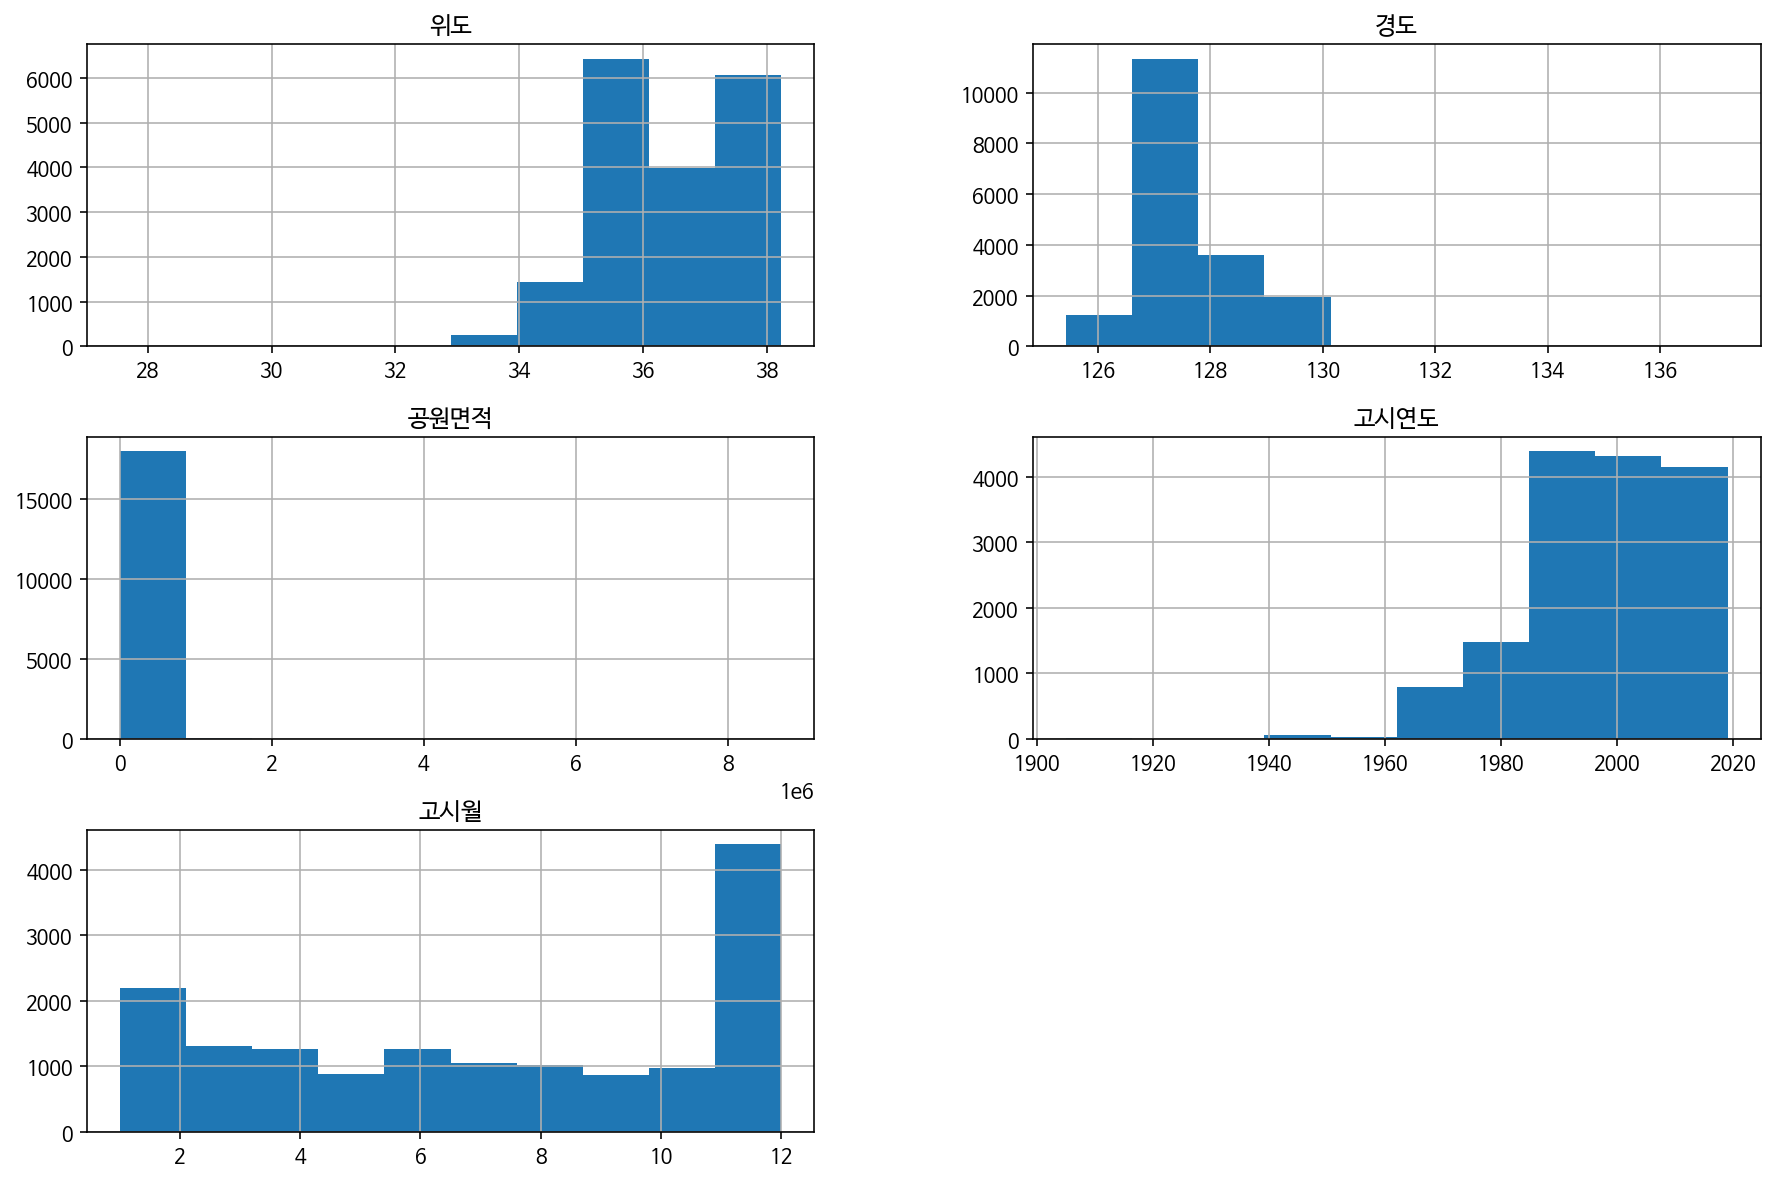

In [ ]:
h = df.hist(figsize=(15,10))

In [ ]:
df.describe()

,위도,경도,공원면적,고시연도,고시월
count,18137.000000,18137.000000,1.813700e+04,15225.000000,15225.000000
mean,36.335922,127.543937,3.781196e+04,1997.238555,7.097274
std,1.051835,0.892670,2.203052e+05,13.592078,3.753724
min,27.551606,125.430955,0.000000e+00,1905.000000,1.000000
25%,35.275430,126.872301,1.503000e+03,1989.000000,4.000000
50%,36.364729,127.130926,2.159000e+03,2000.000000,7.000000
75%,37.404278,128.466193,1.025460e+04,2008.000000,11.000000
max,38.224926,137.202661,8.703000e+06,2019.000000,12.000000


###범주형 변수 요약

In [ ]:
var_objects = data_types[data_types == "object"]
var_objects = var_objects.index.tolist()
var_objects[:5]

['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소']

In [ ]:
df.describe(include = "object")

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV,전화번호(전처리)
count,18137,18137,18137,18137,17158,4845,6964,5084,1160,3116,17383,16957,18137,18137,18137,18137,18137,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,16957
unique,14710,12423,10,15186,14419,1485,1237,1102,378,993,279,497,112,219,219,17,232,730,2,2,2,2,2,2,2,2,2,2,2,395
top,31110-60001,공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,전라남도 무안군 삼향읍 남악리 미지정 간척지,운동기구,조합놀이대,화장실,-,-,경상남도 창원시청,055-212-4501,2019-09-24,5670000,경상남도 창원시,경기도,창원시,화장실,False,False,False,False,False,False,False,False,False,False,False,055-***-**01
freq,124,145,9987,18,18,360,1526,1037,250,141,1176,344,1344,1176,1176,3318,1176,1086,2876,4473,4591,4052,4436,4234,4135,5063,5078,5081,5078,696


###crosstab

In [ ]:
manage_category = pd.crosstab(index=df["관리기관명"],columns=df["공원구분"])
manage_category[manage_category["체육공원"] > 5].style.background_gradient()

공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
관리기관명,,,,,,,,,,
경기도 김포시 체육과,0,0,0,0,0,0,0,0,0,7
경기도 남양주시청,33,0,0,2,5,25,4,68,4,6
경기도 시흥시청,37,0,1,0,7,6,3,72,0,6
경상남도 창원시청,224,0,0,8,8,100,0,816,0,20
대전광역시 대덕구청,11,1,0,0,3,8,0,50,1,6
성남시 공원과,50,0,0,1,0,0,0,0,2,6
전라남도 장성군청,14,0,0,0,4,118,2,10,2,6


In [ ]:
city_category = pd.crosstab(index=df["시도"],columns=df["공원구분"])
city_category.style.background_gradient()

공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
시도,,,,,,,,,,
강원도,141,0,2,1,8,85,10,391,4,6
경기도,806,17,1,8,91,406,61,1821,34,73
경상남도,390,0,3,8,25,178,17,1161,12,31
경상북도,178,3,0,0,18,100,26,575,11,6
광주광역시,97,0,0,0,0,18,5,305,1,3
대구광역시,125,0,0,0,5,57,6,381,2,10
대전광역시,99,1,0,1,12,47,12,315,1,9
부산광역시,144,16,1,2,14,96,9,365,3,3
서울특별시,332,70,4,1,19,183,4,1117,11,4


## 시도별 공원 분포

### 시도별 공원 비율

In [ ]:
city_count = df["시도"].value_counts().to_frame()# 데이터 프레임 화

In [ ]:
city_mean = df["시도"].value_counts(normalize = True).to_frame() # 데이터 프레임 화

In [ ]:
city = city_count.merge(city_mean, left_index=True, right_index=True)
city.columns = ["합계","비율"]
city.style.background_gradient()

,합계,비율
경기도,3318,0.182941
전라남도,1882,0.103766
경상남도,1825,0.100623
서울특별시,1745,0.096212
충청남도,1723,0.094999
전라북도,1137,0.062690
경상북도,917,0.050560
충청북도,899,0.049567
울산광역시,887,0.048906
인천광역시,675,0.037217


###공원 구분별 분포

In [ ]:
df["공원구분"]

0         문화공원
1         근린공원
2          소공원
3        어린이공원
4        어린이공원
         ...  
18132    어린이공원
18133     근린공원
18134     근린공원
18135     근린공원
18136     수변공원
Name: 공원구분, Length: 18137, dtype: object

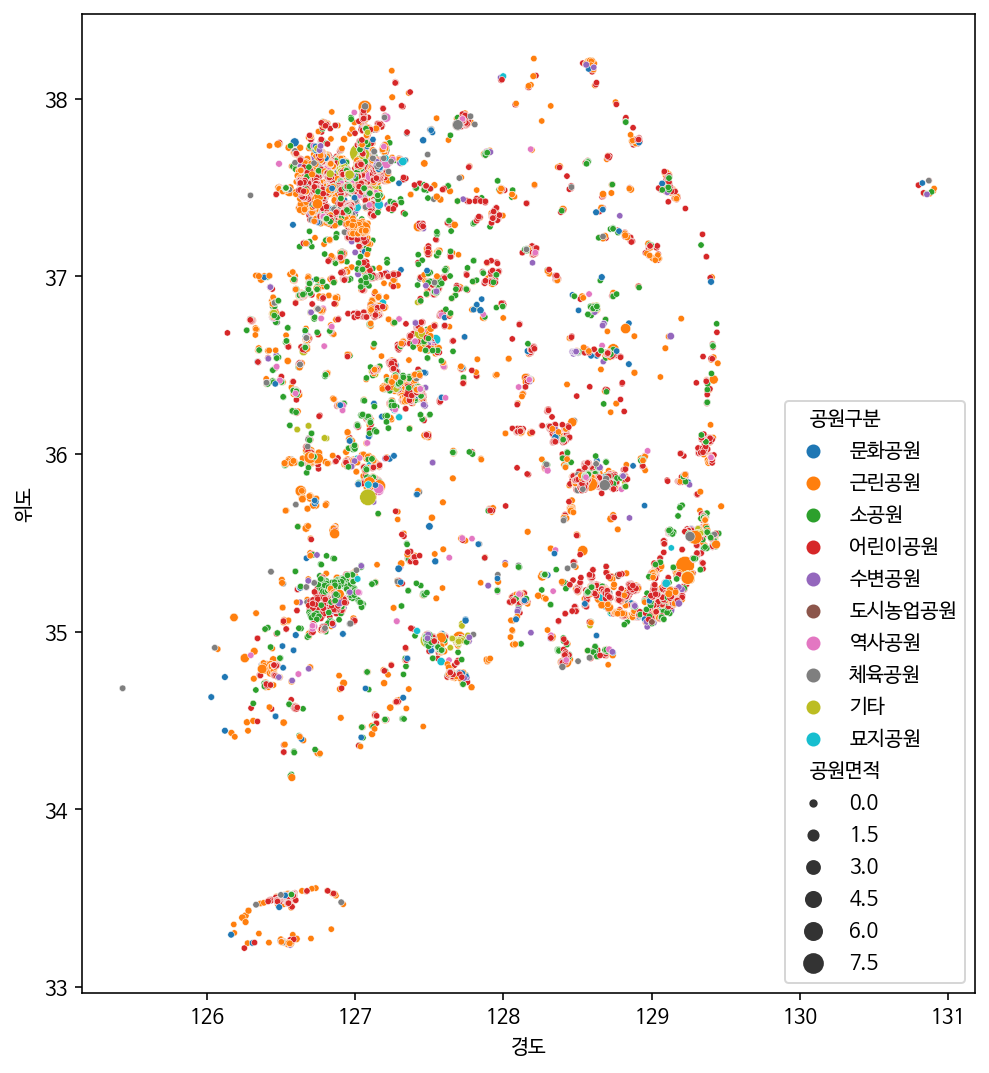

In [ ]:
plt.figure(figsize=(8,9))
sns.scatterplot(data = df_park, x = "경도", y = "위도", hue = "공원구분", size = "공원면적", sizes = (10,100))

###시도별 공원 분포

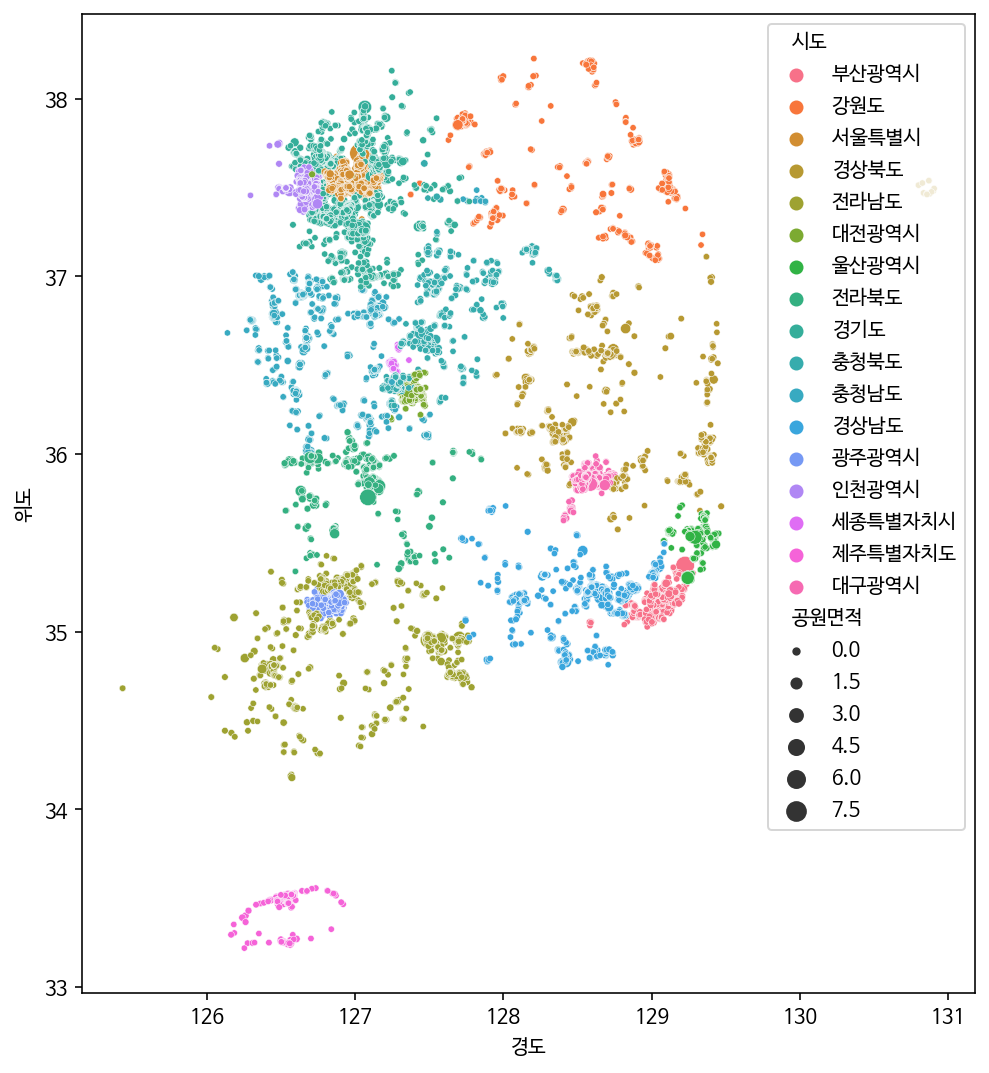

In [ ]:
plt.figure(figsize=(8,9))
sns.scatterplot(data = df_park, x = "경도", y = "위도", hue = "시도", size = "공원면적", sizes = (10,100))

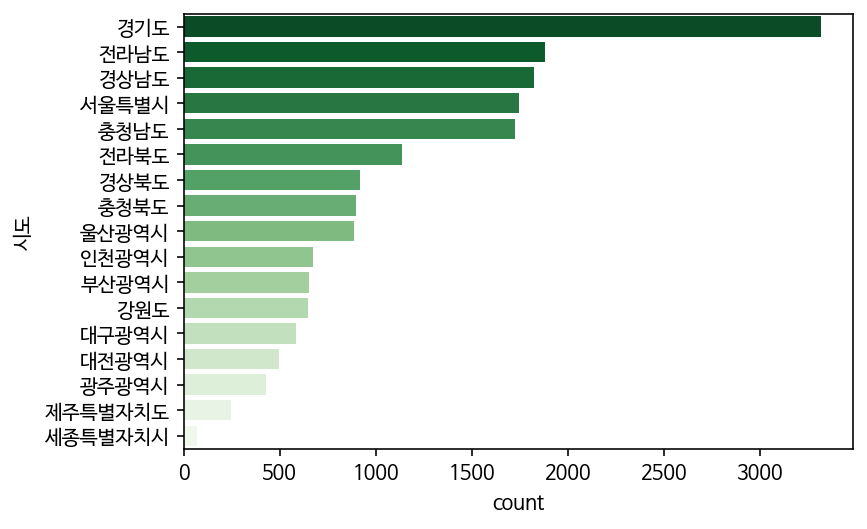

In [ ]:
sns.countplot(data = df, y= "시도", order = city_count.index, palette="Greens_r")

### 특정 공원구분 가져오기

In [ ]:
df["공원구분"].value_counts()

어린이공원     9987
근린공원      4170
소공원       2647
문화공원       322
수변공원       301
기타         260
체육공원       230
역사공원       164
묘지공원        43
도시농업공원      13
Name: 공원구분, dtype: int64

In [ ]:
park_type = r'.*((역사|체육|수변|문화)공원).*'

park = df[df["공원구분"].str.match(park_type)]
park.shape

(1017, 36)

In [ ]:
var_pairs = var_numbers
var_pairs.append("공원구분")
var_pairs

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월', '공원구분']

In [ ]:
var_pairs.remove("지정고시일")
var_pairs.remove("고시연도")
var_pairs.remove("고시월")
var_pairs

['위도', '경도', '공원면적', '공원구분']

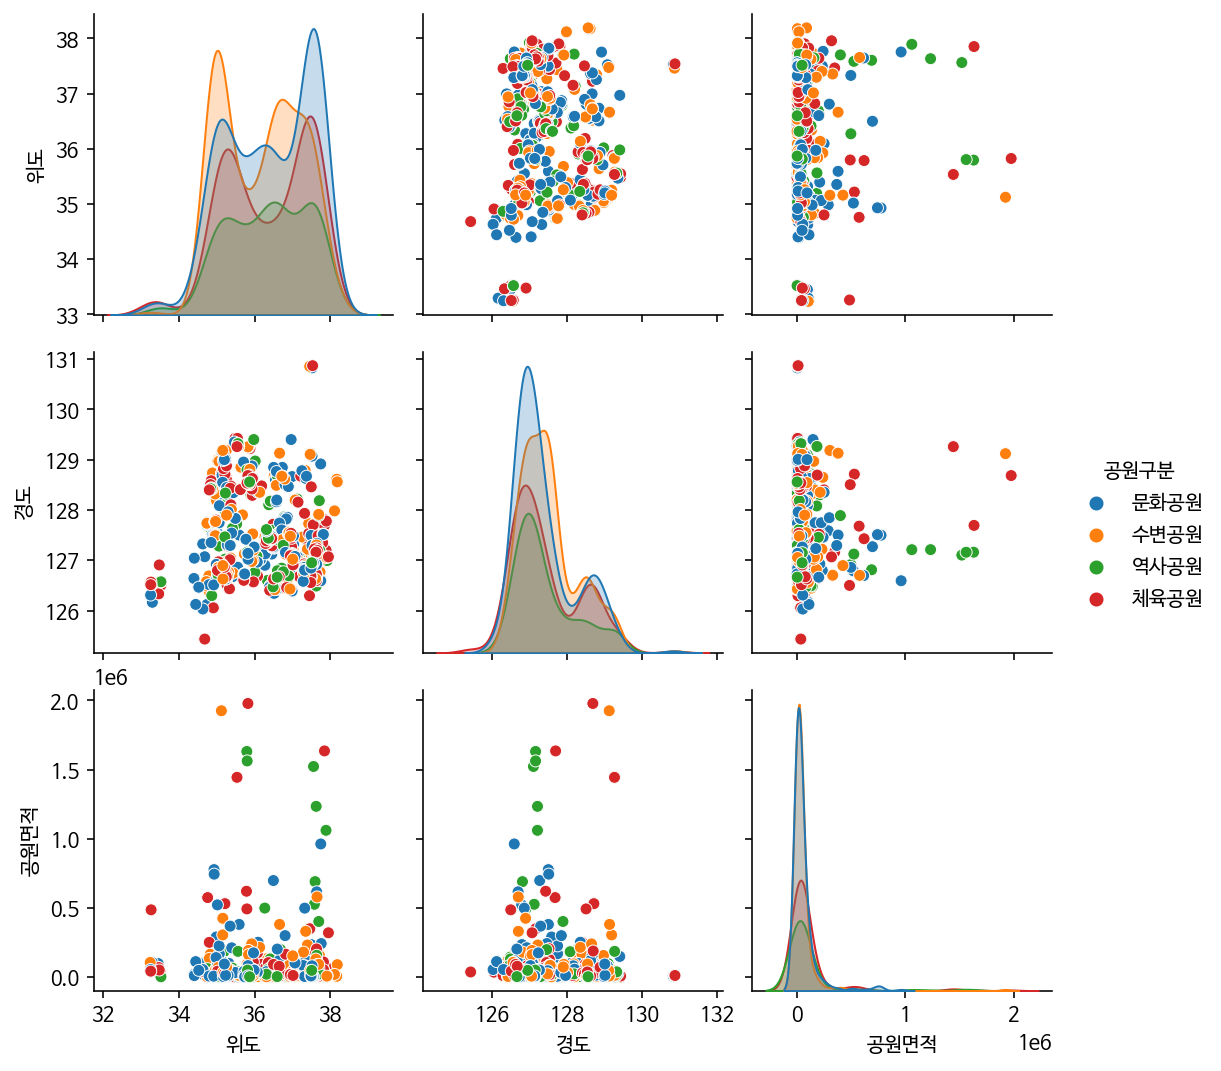

In [ ]:
sns.pairplot(park[var_pairs], hue = "공원구분")

###피벗테이블로 시도별 공원수와 평균 면적 구하기

In [ ]:
park_size = pd.pivot_table(df, index = "시도", values = "공원면적", aggfunc = ["count","mean","median"])

park_size.style.background_gradient()

,count,mean,median
,공원면적,공원면적,공원면적
시도,,,
강원도,648,29539.004630,1886.500000
경기도,3318,27628.744093,2527.900000
경상남도,1825,51390.226795,2163.000000
경상북도,917,29771.096947,2146.000000
광주광역시,429,20571.033333,2192.000000
대구광역시,586,28622.956143,2044.150000
대전광역시,497,36507.091952,2069.100000
부산광역시,653,54162.930521,2158.000000


## 내가 사는 지역의 공원을 지도에 표시해보기

In [ ]:
df_sn = df[(df["시도"] == "서울특별시") & (df["구군"] == "송파구")]
df_sn.shape

(158, 36)

In [ ]:
df_sn[["시도","구군","공원명"]]

,시도,구군,공원명
213,서울특별시,송파구,가락
214,서울특별시,송파구,개나리
215,서울특별시,송파구,개롱
216,서울특별시,송파구,거여
217,서울특별시,송파구,건너말
...,...,...,...
366,서울특별시,송파구,방이동고분
367,서울특별시,송파구,백제초기적석총
368,서울특별시,송파구,성내천
369,서울특별시,송파구,올림픽공원


In [ ]:
df_sn.loc[df_sn["공원명"].str.contains("올림픽"),["공원명","위도","경도"]]

,공원명,위도,경도
369,올림픽공원,37.520341,127.115518


In [ ]:
cols = "공원보유시설(운동시설)	공원보유시설(유희시설)	공원보유시설(편익시설)	공원보유시설(교양시설)"

cols = cols.split("\t")
cols

['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)']

In [ ]:
df_sn.loc[df_sn["공원명"].str.contains("올림픽"),cols]

,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설)
369,NaN,NaN,NaN,NaN


In [ ]:
import folium

m = folium.Map([37.520341,127.115518], zoom_start=13)

for n in df_sn.index:
  lat = df_sn.loc[n,"위도"]
  long = df_sn.loc[n,"경도"]
  tooltip = df_sn.loc[n,"공원명"] + " " + df_sn.loc[n,"소재지도로명주소"]
  folium.Marker([lat, long], tooltip = tooltip).add_to(m)


m